In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# PLOTLY EXPRESS EXAMPLES 

In [15]:
fig = px.bar(titanic_df, x="Pclass", y="PassengerId", color="Pclass", labels={"Pclass": "Clase", "PassengerId": "Cantidad de pasajeros"}, 
             text="Pclass", title="Pasajeros por clase en el Titanic", template="plotly_dark")
print(" Gráfico de barras para visualizar el número de pasajeros por clase")
fig.show()


 Gráfico de barras para visualizar el número de pasajeros por clase


In [16]:
fig = px.pie(titanic_df, names="Survived", labels={"Survived": "Supervivientes"}, title="Proporción de supervivientes y no supervivientes en el Titanic",
                template="plotly_dark")
print("Gráfico de pastel para visualizar la proporción de supervivientes y no supervivientes")
fig.show()

Gráfico de pastel para visualizar la proporción de supervivientes y no supervivientes


In [17]:
fig = px.box(titanic_df, x="Pclass", y="Age", labels={"Pclass": "Clase", "Age": "Edad"}, title="Distribución de edades por clase en el Titanic",
                template="plotly_dark")
print("Gráfico de caja para visualizar la distribución de las edades de los pasajeros por clase")
fig.show()

Gráfico de caja para visualizar la distribución de las edades de los pasajeros por clase


In [18]:
fig = px.scatter(titanic_df, x="Age", y="Fare", color="Survived", labels={"Age": "Edad", "Fare": "Tarifa", "Survived": "Supervivientes"}, 
                 title="Relación entre edad y tarifa de los pasajeros en el Titanic", template="plotly_dark")
print("Gráfico de dispersión para visualizar la relación entre las edades y las tarifas de los pasajeros en el Titanic")
fig.show()

Gráfico de dispersión para visualizar la relación entre las edades y las tarifas de los pasajeros en el Titanic


In [19]:
fig = px.histogram(titanic_df, x="Pclass", y="PassengerId", color="Sex", facet_col="Survived",
                    labels={"Pclass": "Clase", "PassengerId": "Cantidad de pasajeros", "Sex": "Género", "Survived": "Supervivientes"}, 
                    title="Supervivientes y no supervivientes por género y clase en el Titanic", template="plotly_dark")
print("Gráfico de barras apiladas para visualizar la cantidad de supervivientes y no supervivientes por género y clase")
fig.show()

Gráfico de barras apiladas para visualizar la cantidad de supervivientes y no supervivientes por género y clase


# GO EXAMPLES

In [20]:
pclass_counts = titanic_df['Pclass'].value_counts().sort_index()

fig = go.Figure(go.Bar(x=pclass_counts.index, y=pclass_counts.values, text=pclass_counts.values, textposition='auto'))
fig.update_layout(title='Pasajeros por clase en el Titanic', xaxis_title='Clase', yaxis_title='Cantidad de pasajeros')
fig.show()

In [21]:
survived_counts = titanic_df['Survived'].value_counts()

fig = go.Figure(go.Pie(labels=["No supervivientes", "Supervivientes"], values=survived_counts.values))
fig.update_layout(title="Proporción de supervivientes y no supervivientes en el Titanic")
fig.show()

In [22]:
fig = go.Figure()

for pclass in sorted(titanic_df['Pclass'].unique()):
    fig.add_trace(go.Box(y=titanic_df.loc[titanic_df['Pclass'] == pclass, 'Age'], name=f'Clase {pclass}', boxpoints='all'))

fig.update_layout(title='Distribución de edades por clase en el Titanic', xaxis_title='Clase', yaxis_title='Edad')
fig.show()

In [23]:
fig = go.Figure()

for survived in titanic_df['Survived'].unique():
    fig.add_trace(go.Scatter(x=titanic_df.loc[titanic_df['Survived'] == survived, 'Age'],
                             y=titanic_df.loc[titanic_df['Survived'] == survived, 'Fare'],
                             mode='markers',
                             name="Supervivientes" if survived else "No supervivientes"))

fig.update_layout(title="Relación entre edad y tarifa de los pasajeros en el Titanic", xaxis_title="Edad", yaxis_title="Tarifa")
fig.show()

In [24]:
pivot_df = titanic_df.pivot_table(index=["Sex", "Pclass"], columns="Survived", values="PassengerId", aggfunc="count").reset_index()

fig = go.Figure()

for survived in titanic_df['Survived'].unique():
    for sex in titanic_df['Sex'].unique():
        fig.add_trace(go.Bar(x=pivot_df.loc[pivot_df['Sex'] == sex, 'Pclass'],
                             y=pivot_df.loc[pivot_df['Sex'] == sex, survived],
                             name=f'{"Supervivientes" if survived else "No supervivientes"} - {sex}',
                             legendgroup=sex,
                             visible=True if survived == 0 else "legendonly"))

fig.update_layout(title="Supervivientes y no supervivientes por género y clase en el Titanic",
                  xaxis_title="Clase",
                  yaxis_title="Cantidad de pasajeros",
                  barmode="stack")
fig.show()
                        
            

In [25]:
pivot_df = titanic_df.pivot_table(index=["Embarked", "Survived"], values="PassengerId", aggfunc="count").reset_index()

fig = go.Figure()

for survived in titanic_df['Survived'].unique():
    fig.add_trace(go.Bar(x=pivot_df.loc[pivot_df['Survived'] == survived, 'Embarked'],
                         y=pivot_df.loc[pivot_df['Survived'] == survived, 'PassengerId'],
                         name=f'{"Supervivientes" if survived else "No supervivientes"}'))

fig.update_layout(title="Cantidad de pasajeros por puerto de embarque y supervivencia en el Titanic",
                  xaxis_title="Puerto de embarque",
                  yaxis_title="Cantidad de pasajeros",
                  barmode="group")
fig.show()

# FOLIUM

In [42]:
import folium

locations = {
    "Southampton": (50.9097, -1.4044),
    "Cherbourg": (49.6337, -1.6221),
    "Queenstown": (51.8503, -8.2943)  # Actualmente conocida como Cobh, Irlanda
}

m = folium.Map(location=(52.0, -20.0), zoom_start=5)

for port, coordinates in locations.items():
    folium.Marker(location=coordinates, popup=f"{port}").add_to(m)

m

# MATPLOT + SEABORN

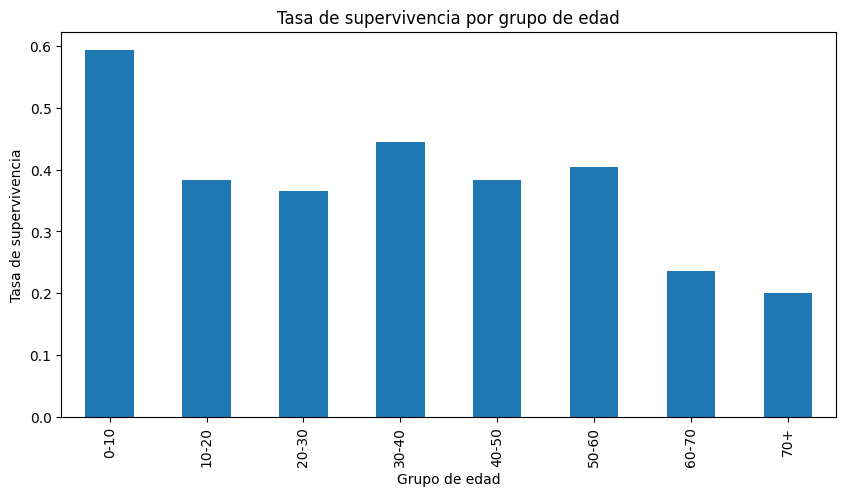

In [43]:
import matplotlib.pyplot as plt

# Crear grupos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins, labels=labels)

# Calcular la tasa de supervivencia por grupo de edad
age_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()

# Visualizar la tasa de supervivencia por grupo de edad
age_survival.plot(kind='bar', figsize=(10, 5))
plt.title('Tasa de supervivencia por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Tasa de supervivencia')
plt.show()

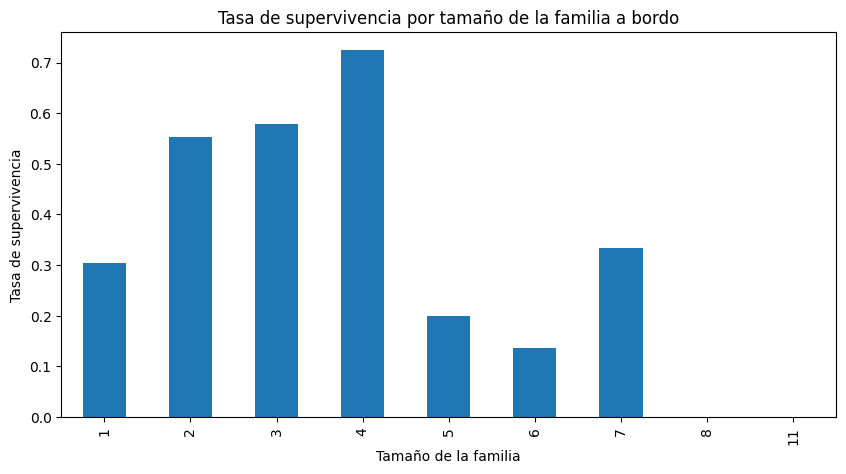

In [44]:
# Calcular el tamaño de la familia
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Calcular la tasa de supervivencia por tamaño de la familia
family_survival = titanic_df.groupby('FamilySize')['Survived'].mean()

# Visualizar la tasa de supervivencia por tamaño de la familia
family_survival.plot(kind='bar', figsize=(10, 5))
plt.title('Tasa de supervivencia por tamaño de la familia a bordo')
plt.xlabel('Tamaño de la familia')
plt.ylabel('Tasa de supervivencia')
plt.show()

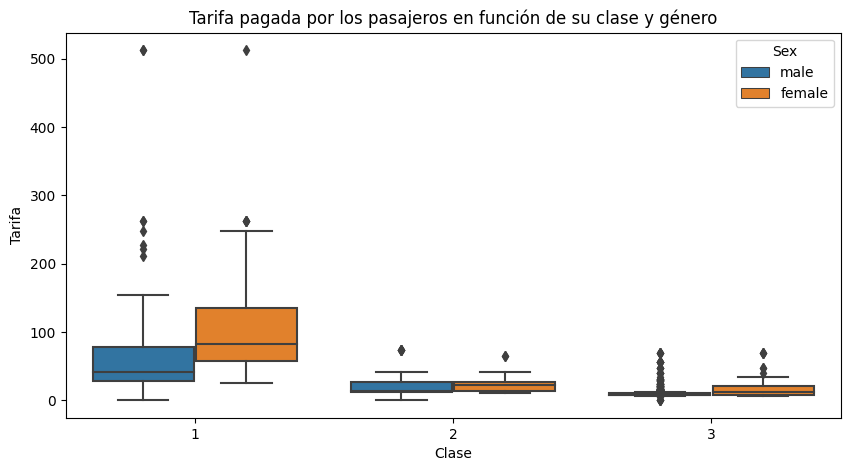

In [45]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', hue='Sex', data=titanic_df)
plt.title('Tarifa pagada por los pasajeros en función de su clase y género')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

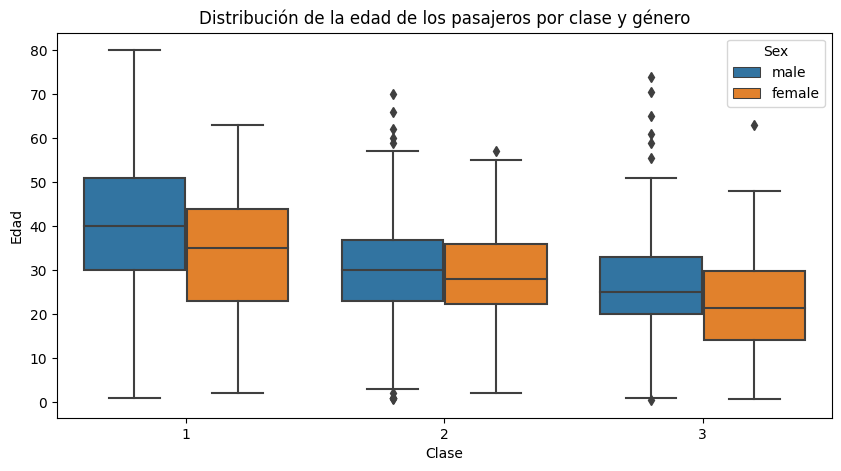

In [46]:
# Visualizar la distribución de la edad de los pasajeros por clase y género
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.title('Distribución de la edad de los pasajeros por clase y género')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

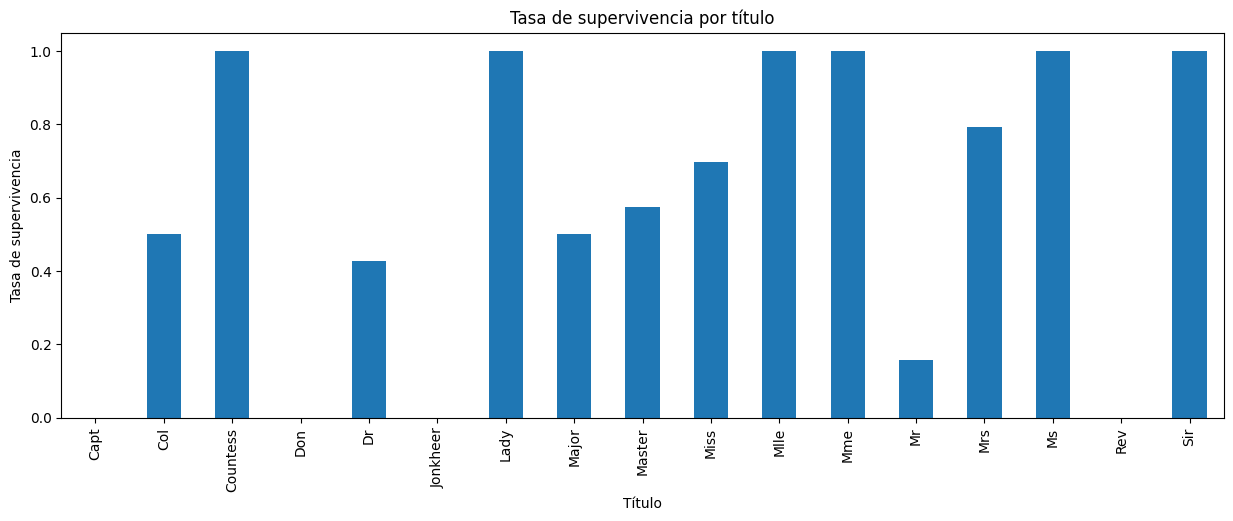

In [47]:
# Extraer el título de los pasajeros
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Calcular la tasa de supervivencia por título
title_survival = titanic_df.groupby('Title')['Survived'].mean()

# Visualizar la tasa de supervivencia por título
title_survival.plot(kind='bar', figsize=(15, 5))
plt.title('Tasa de supervivencia por título')
plt.xlabel('Título')
plt.ylabel('Tasa de supervivencia')
plt.show()

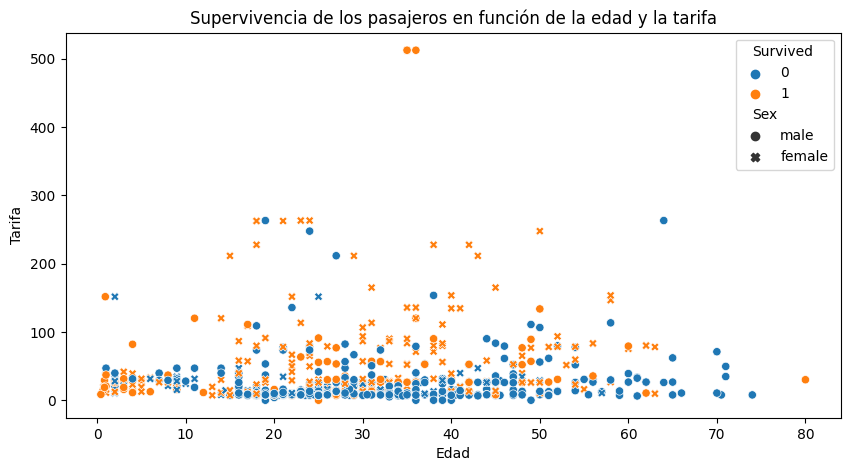

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.title('Supervivencia de los pasajeros en función de la edad y la tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

# PLOTLY 3D


In [51]:
# Crear una gráfica 3D con la edad, la tarifa y la clase de los pasajeros
fig = px.scatter_3d(
    titanic_df,
    x='Age',
    y='Fare',
    z='Pclass',
    color='Survived',
    color_discrete_sequence=['red', 'green'],
    symbol='Sex',
    opacity=0.8,
    width=600,
    height=600
)

# Establecer el título y los ejes
fig.update_layout(
    title='Visualización 3D de la edad, tarifa y clase de los pasajeros del Titanic',
    scene=dict(
        xaxis_title='Edad',
        yaxis_title='Tarifa',
        zaxis_title='Clase'
    )
)

# Mostrar la gráfica
fig.show()